# Data Collection and Preparation

# Mary Donovan Martello

## The first part of this project consisted of collecting, cleaning and preparing data from three different sources: a flat file, a website (collected by scraping the website), and an API.  The final product included joining all three sources on the same key, storing them in a SQLite database and executing SQL commands.  This notebook includes loading a CSV file and cleaning the data.

# Part 1:  Flat File Data Source / Cleaning

In [1]:

%matplotlib inline

# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## The data for this notebook is a mutual fund data held in a csv file.  It can be downloaded from: https://www.kaggle.com/stefanoleone992/mutual-funds-and-etfs?select=Mutual+Funds.csv

In [38]:
# import file
mf = pd.read_csv('Mutual Funds.csv')
mf.head()

C:\Users\trave\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,5.302800e+08,12.79,1.43,3,2007-07-29,Blend,...,0.31,0.00,0.73,0.01,5.05,0.05,2.26,0.02,6.71,0.07
1,AAADX,Aberdeen Income Builder Fund Class A,Large Blend,Aberdeen,8.884000e+07,9.21,2.62,2,2011-12-29,Blend,...,0.62,0.01,0.97,0.01,11.55,0.11,6.91,0.08,12.77,0.14
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,1.080000e+09,16.00,0.00,3,1999-10-28,Growth,...,0.86,0.01,1.01,0.01,12.65,0.13,10.22,0.10,13.44,0.15
3,AAAIX,American Century Strategic Allocation: Aggress...,Allocation - 70% to 85% Equity,American Century Investments,7.852700e+08,11.57,1.38,4,2000-07-31,Growth,...,0.63,0.01,1.00,0.01,5.77,0.05,4.14,0.03,8.24,0.08
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Tactical Allocation,Horizon Investments,5.271300e+08,11.62,0.66,4,2012-01-30,Blend,...,0.47,0.00,NaN,0.01,4.5,0.04,2.98,0.03,NaN,0.09


In [39]:
mf.shape

(25308, 125)

## Data Cleaning

### Fix Datatypes.

In [40]:

# Importing the file with pandas showed that six columns had mixed datatypes.  The warning say to set datatype to object, but
#   that did not work because then the numbers were strings instead of integers or floats.  
# In examining these columns I discovered that some of the values were entered as strings with a comma in them.  I transformed
#    these six columns by replacing the commas in the strings so that I could convert the datatypes to floats.

mf['price_earnings'] = mf['price_earnings'].str.replace(',', "").astype(float)
mf['price_sales'] = mf['price_sales'].str.replace(',', "").astype(float)
mf['price_cashflow'] = mf['price_cashflow'].str.replace(',', "").astype(float)
mf['fund_treynor_ratio_3years'] = mf['fund_treynor_ratio_3years'].str.replace(',', "").astype(float)
mf['fund_treynor_ratio_5years'] = mf['fund_treynor_ratio_5years'].str.replace(',', "").astype(float)
mf['fund_treynor_ratio_10years'] = mf['fund_treynor_ratio_10years'].str.replace(',', "").astype(float)
# ['price_earnings', 'price_values', 'price_cashflow', 'fund_treynor_ratio_3years', 'fund_treynor_ratio_5years', 'fund_treynor_ratio_10years']

In [41]:
mf.shape

(25308, 125)

In [39]:
# Set it None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [40]:
# Check for missing values
mf.isnull().sum()

fund_name                             0
fund_extended_name                    0
category                              0
fund_family                           0
net_assets                          121
                                  ...  
category_treynor_ratio_3years       108
fund_treynor_ratio_5years         11291
category_treynor_ratio_5years       108
fund_treynor_ratio_10years         9198
category_treynor_ratio_10years      108
Length: 125, dtype: int64

In [41]:
for c in mf.columns:
    miss = mf[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))

net_assets has 121 missing value(s)
ytd_return has 110 missing value(s)
fund_yield has 129 missing value(s)
investment has 1502 missing value(s)
size has 1502 missing value(s)
portfolio_cash has 115 missing value(s)
portfolio_stocks has 115 missing value(s)
portfolio_bonds has 115 missing value(s)
portfolio_others has 115 missing value(s)
portfolio_preferred has 115 missing value(s)
portfolio_convertable has 115 missing value(s)
price_earnings has 9010 missing value(s)
price_book has 115 missing value(s)
price_sales has 17158 missing value(s)
price_cashflow has 9010 missing value(s)
median_market_cap has 115 missing value(s)
basic_materials has 115 missing value(s)
consumer_cyclical has 115 missing value(s)
financial_services has 115 missing value(s)
real_estate has 115 missing value(s)
consumer_defensive has 115 missing value(s)
healthcare has 115 missing value(s)
utilities has 115 missing value(s)
communication_services has 115 missing value(s)
energy has 115 missing value(s)
industr

### Convert date format in column to year only.

In [42]:
# convert date format in inception_date to year only
mf['inception_date']

0        2007-07-29
1        2011-12-29
2        1999-10-28
3        2000-07-31
4        2012-01-30
            ...    
25303    2014-02-27
25304    2015-08-30
25305    2015-08-30
25306    2015-08-30
25307    2015-08-30
Name: inception_date, Length: 25308, dtype: object

In [43]:
# https://stackoverflow.com/questions/28133018/convert-pandas-series-to-datetime-in-a-dataframe
import datetime
# dfClaims["incident_date"]= pandas.to_datetime(dfClaims["incident_date"])
mf['inception_date'] = pd.to_datetime(mf['inception_date'])

mf['inception_date'] = mf['inception_date'].dt.year

In [44]:
mf['inception_date']

0        2007
1        2011
2        1999
3        2000
4        2012
         ... 
25303    2014
25304    2015
25305    2015
25306    2015
25307    2015
Name: inception_date, Length: 25308, dtype: int64

In [45]:
mf.head()

,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,5.302800e+08,12.79,1.43,3,2007,Blend,...,0.31,0.00,0.73,0.01,5.05,0.05,2.26,0.02,6.71,0.07
1,AAADX,Aberdeen Income Builder Fund Class A,Large Blend,Aberdeen,8.884000e+07,9.21,2.62,2,2011,Blend,...,0.62,0.01,0.97,0.01,11.55,0.11,6.91,0.08,12.77,0.14
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,1.080000e+09,16.00,0.00,3,1999,Growth,...,0.86,0.01,1.01,0.01,12.65,0.13,10.22,0.10,13.44,0.15
3,AAAIX,American Century Strategic Allocation: Aggress...,Allocation - 70% to 85% Equity,American Century Investments,7.852700e+08,11.57,1.38,4,2000,Growth,...,0.63,0.01,1.00,0.01,5.77,0.05,4.14,0.03,8.24,0.08
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Tactical Allocation,Horizon Investments,5.271300e+08,11.62,0.66,4,2012,Blend,...,0.47,0.00,NaN,0.01,4.50,0.04,2.98,0.03,NaN,0.09


### Replace missing values in string columns and float columns.

**Fill string missing values.**

In [47]:
# fill in string missing values
mf[['investment', 'size', 'median_market_cap']] = mf[['investment', 'size', 'median_market_cap']].fillna('FILL')

In [48]:
for c in mf.columns:
    miss = mf[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))

net_assets has 121 missing value(s)
ytd_return has 110 missing value(s)
fund_yield has 129 missing value(s)
portfolio_cash has 115 missing value(s)
portfolio_stocks has 115 missing value(s)
portfolio_bonds has 115 missing value(s)
portfolio_others has 115 missing value(s)
portfolio_preferred has 115 missing value(s)
portfolio_convertable has 115 missing value(s)
price_earnings has 9010 missing value(s)
price_book has 115 missing value(s)
price_sales has 17158 missing value(s)
price_cashflow has 9010 missing value(s)
basic_materials has 115 missing value(s)
consumer_cyclical has 115 missing value(s)
financial_services has 115 missing value(s)
real_estate has 115 missing value(s)
consumer_defensive has 115 missing value(s)
healthcare has 115 missing value(s)
utilities has 115 missing value(s)
communication_services has 115 missing value(s)
energy has 115 missing value(s)
industrials has 115 missing value(s)
technology has 115 missing value(s)
bond_maturity has 17113 missing value(s)
bond

In [49]:
mf['investment'].value_counts()

Blend     10420
Growth     6760
Value      6626
FILL       1502
Name: investment, dtype: int64

### Impute mean for missing numerical values.

In [50]:
# now fill all missing numerical values with mean
# https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
mf = mf.fillna(mf.mean())
#mf[['investment', 'size']] = mf[['investment', 'size']].fillna('FILL')

In [51]:
mf['fund_return_ytd'].isnull().sum()

0

In [52]:
for c in mf.columns:
    miss = mf[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))

### Remove duplicates.

In [54]:
# check for duplicate columns
# original shape
mf.shape

(25308, 125)

In [55]:
# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
# this tests for duplicate column names and there are none
mf = mf.loc[:,~mf.columns.duplicated()]
mf.shape

(25308, 125)

In [55]:
# check for duplicate columns by values
mf = mf.T.drop_duplicates().T


In [56]:
# new shape after removing duplicate column
mf.shape

(25308, 124)

In [57]:
# Select duplicate rows except first occurrence based on all columns
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicateRowsDF = mf[mf.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years


### Remove Outlier

**Start by looking for outliers with histograms and value counts.**

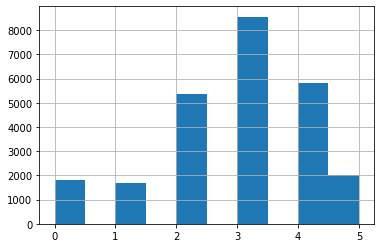

In [60]:
# histogram did not show outlier, but ...
mf['morningstar_return_rating'].hist()

In [61]:
# the value counts check shows an outlier because all morningstar ratings are whole numbers
mf['morningstar_return_rating'].value_counts()

3.000000    8560
4.000000    5805
2.000000    5385
5.000000    2033
0.000000    1824
1.000000    1700
2.826688       1
Name: morningstar_return_rating, dtype: int64

In [59]:
mf.shape

(25308, 124)

In [60]:
# drop morningstar_return_rating outlier observation
#dfClaims[dfClaims.umbrella_limit >= 0]
mf.drop(mf[(mf['morningstar_return_rating'] < 3) & (mf['morningstar_return_rating'] > 2)].index, inplace = True)


In [61]:
mf['morningstar_return_rating'].value_counts()

3.0    8560
4.0    5805
2.0    5385
5.0    2033
0.0    1824
1.0    1700
Name: morningstar_return_rating, dtype: int64

In [65]:
# export datafram to a csv file
mf.to_csv (r'C:\dev\code\540FinalProject\flat_dataframe.csv', index = False, header=True)